In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
import sys

In [15]:
file_name = input("파일이름을 입력해 주세요 : ") # wikisent2
sys.stdin = open('{}.txt'.format(file_name),'r')

text_counter = Counter()

for line in sys.stdin:
    txt = line.strip().lower() # 불러온 문장의 앞뒤 여백 제거 및 소문자 변환 시행 
    text_counter.update(re.sub('\'',' ',re.sub(r' [ ]*',' ',re.sub(r'[^a-z\' ]','',txt).strip())).split(' '))

sys.stdin.close()

파일이름을 입력해 주세요 : wikisent2


In [31]:
count_word = []
for word, count in text_counter.most_common(1000):
    count_word.append([word,count])
    print(word , '\t', count)
#     word_count = word + '\t' + str(count) + '\n'
#     sys.stdout.write(word_count)
#     print(word , '\t', count)

the	10839676
of	5342696
in	4966073
and	4525128
a	3962737
is	3351109
to	2237198
was	1928878
by	1398786
for	1290576
on	1285472
as	1285041
it	1095243
s	931022
an	856902
with	848293
from	810410
at	767453
he	716407
that	580234
are	474501
has	450509
his	438801
which	427834
also	426838
or	416942
born	403531
its	337130
first	336411
who	330381
this	324361
new	316258
american	298965
one	298729
were	291009
united	283798
be	280636
family	265841
film	262081
known	252560
album	251880
their	242289
states	238141
been	229523
released	225865
species	225502
she	215973
national	208329
school	206708
after	204497
have	201137
two	197674
state	195299
other	189724
world	184915
county	184824
they	179729
but	179323
located	179164
	178323
university	175926
had	173390
south	171475
not	168819
series	168121
city	167319
may	165463
district	160484
th	160045
during	158115
football	157365
her	155862
played	152498
former	152193
used	148191
most	145081
all	142404
team	140735
part	139870
between	139533
league	137847
music	

In [32]:
a

[['10839676', 'the'],
 ['5342696', 'of'],
 ['4966073', 'in'],
 ['4525128', 'and'],
 ['3962737', 'a'],
 ['3351109', 'is'],
 ['2237198', 'to'],
 ['1928878', 'was'],
 ['1398786', 'by'],
 ['1290576', 'for'],
 ['1285472', 'on'],
 ['1285041', 'as'],
 ['1095243', 'it'],
 ['931022', '', 's'],
 ['856902', '', 'an'],
 ['848293', '', 'with'],
 ['810410', '', 'from'],
 ['767453', '', 'at'],
 ['716407', '', 'he'],
 ['580234', '', 'that'],
 ['474501', '', 'are'],
 ['450509', '', 'has'],
 ['438801', '', 'his'],
 ['427834', '', 'which'],
 ['426838', '', 'also'],
 ['416942', '', 'or'],
 ['403531', '', 'born'],
 ['337130', '', 'its'],
 ['336411', '', 'first'],
 ['330381', '', 'who'],
 ['324361', '', 'this'],
 ['316258', '', 'new'],
 ['298965', '', 'american'],
 ['298729', '', 'one'],
 ['291009', '', 'were'],
 ['283798', '', 'united'],
 ['280636', '', 'be'],
 ['265841', '', 'family'],
 ['262081', '', 'film'],
 ['252560', '', 'known'],
 ['251880', '', 'album'],
 ['242289', '', 'their'],
 ['238141', '', 's

In [37]:
word_df = pd.DataFrame(a,columns=['count','word'])
word_df['count'] = word_df['count'].astype('int64')
word_df['log_count'] = np.log(word_df['count'])
word_df = word_df.reset_index()
word_df['index'] = word_df['index'] + 1
word_df['log_index'] = np.log(word_df['index'])
word_df.head()

,index,count,word,log_count,log_index
0,1,10839676,the,16.198724,0.000000
1,2,5342696,of,15.491241,0.693147
2,3,4966073,in,15.418140,1.098612
3,4,4525128,and,15.325156,1.386294
4,5,3962737,a,15.192446,1.609438


In [55]:
np.log10(index)

NameError: name 'index' is not defined

In [38]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x2d4892122c8>,
 <a list of 3 Text yticklabel objects>)

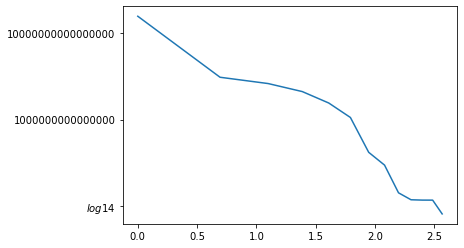

In [54]:
plt.plot(word_df['log_index'], word_df['log_count'])
plt.yticks([14,15,16],['$log{14}$',10**15,10**16])

In [24]:
# 직선 기울기 구하기
slope = (word_df.loc[0,'log_count'] - word_df.loc[999,'log_count'] )/(word_df.loc[0,'log_index'] - word_df.loc[999,'log_index'] )
intercept = word_df.loc[0,'log_count'] - slope * word_df.loc[0,'log_index']
print("직선의 기울기 {} Y절편 {}".format(slope,intercept))

직선의 기울기 -0.9466398635463126 Y절편 16.198723664230187


In [26]:
c = np.exp(intercept)
s = (intercept - word_df.loc[999,'log_count'])/np.log(999)
print("C 의 값: {}".format(c))
print("S 의 값: {}".format(s))

C 의 값: 10839675.999999993
S 의 값: 0.9467769921297957


In [ ]:
# logc = 절편
# -slongk 